# Project 1: Benson.  MTA Outreach Analysis for WTWY

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import Image

In [2]:
%matplotlib inline

In [76]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

## Read in and explore raw data

In [4]:
TURNSTILE_DIR = '../data/mta.info/turnstile/'
raw_df = pd.read_csv(TURNSTILE_DIR + 'turnstile_180113.txt',
                     skiprows=1,
                     names=['ControlArea', 'Unit', 'SCP', 'Station',
                            'LineName', 'Division', 'Date', 'Time',
                            'Description', 'Entries', 'Exits'],
                     dtype={'Entries': np.int, 'Exits': np.int},
                     parse_dates=[6],
                     thousands=',')

In [5]:
raw_df.shape

(201118, 11)

In [6]:
raw_df.dtypes

ControlArea            object
Unit                   object
SCP                    object
Station                object
LineName               object
Division               object
Date           datetime64[ns]
Time                   object
Description            object
Entries                 int64
Exits                   int64
dtype: object

In [7]:
raw_df.sample(5)

,ControlArea,Unit,SCP,Station,LineName,Division,Date,Time,Description,Entries,Exits
179339,R508,R346,00-00-00,COURT SQ,7,IRT,2018-01-08,07:00:00,REGULAR,2678537,3979581
13245,A084,R125,01-00-01,BROAD ST,JZ,BMT,2018-01-11,16:00:00,REGULAR,674728,11735
21879,C012,R258,01-06-00,4AV-9 ST,DFGMNR,BMT,2018-01-07,11:00:00,REGULAR,46785,379053
190373,R605,R456,00-06-00,HOYT ST,23,IRT,2018-01-08,07:00:00,REGULAR,2695973,1253048
38804,J022,R435,00-00-00,CLEVELAND ST,J,BMT,2018-01-09,00:00:00,REGULAR,3931713,4207539


In [8]:
len(raw_df['Time'].unique())

12161

* **Observation:** Some times are on hour-boundaries, but many are not.

In [9]:
raw_df['DateTime'] = [dt.datetime.strptime(d + ' ' + t, '%Y-%m-%d %H:%M:%S')
                      for d,t in zip(raw_df['Date'].astype(str), raw_df['Time'])]

In [10]:
hourly_mask = (raw_df['DateTime'].dt.minute == 0) & (raw_df['DateTime'].dt.second == 0)

In [11]:
hourly_mask.value_counts()

True     180780
False     20338
Name: DateTime, dtype: int64

* **Observation:** About 90% of the data is recorded on the hour.

In [12]:
sample1_mask = ((raw_df['Date'] == '2018-01-12')
        & (raw_df['Time'] == '04:00:00')
        & (raw_df['Unit'] == 'R173'))
raw_df[sample1_mask]

,ControlArea,Unit,SCP,Station,LineName,Division,Date,Time,Description,Entries,Exits,DateTime
41494,N001,R173,01-05-00,INWOOD-207 ST,A,IND,2018-01-12,04:00:00,REGULAR,301,0,2018-01-12 04:00:00
41536,N001,R173,01-05-01,INWOOD-207 ST,A,IND,2018-01-12,04:00:00,REGULAR,67108872,16777412,2018-01-12 04:00:00
41578,N001,R173,01-06-00,INWOOD-207 ST,A,IND,2018-01-12,04:00:00,REGULAR,4143559,760241,2018-01-12 04:00:00
41620,N001,R173,01-06-01,INWOOD-207 ST,A,IND,2018-01-12,04:00:00,REGULAR,201806894,302650,2018-01-12 04:00:00
41662,N001,R173,01-06-02,INWOOD-207 ST,A,IND,2018-01-12,04:00:00,REGULAR,742566,553216,2018-01-12 04:00:00
41704,N001,R173,01-06-03,INWOOD-207 ST,A,IND,2018-01-12,04:00:00,REGULAR,332417,162116,2018-01-12 04:00:00
41746,N002A,R173,00-00-00,INWOOD-207 ST,A,IND,2018-01-12,04:00:00,REGULAR,5655675,3308405,2018-01-12 04:00:00
41788,N002A,R173,00-00-01,INWOOD-207 ST,A,IND,2018-01-12,04:00:00,REGULAR,9247893,5364605,2018-01-12 04:00:00
41830,N002A,R173,00-00-02,INWOOD-207 ST,A,IND,2018-01-12,04:00:00,REGULAR,6382433,3683969,2018-01-12 04:00:00
41872,N002A,R173,00-05-00,INWOOD-207 ST,A,IND,2018-01-12,04:00:00,REGULAR,3414,0,2018-01-12 04:00:00


In [13]:
sample2_mask = ((raw_df['Date'] == '2018-01-12')
        & (raw_df['Time'] == '08:00:00')
        & (raw_df['Unit'] == 'R173'))
raw_df[sample2_mask]

,ControlArea,Unit,SCP,Station,LineName,Division,Date,Time,Description,Entries,Exits,DateTime
41495,N001,R173,01-05-00,INWOOD-207 ST,A,IND,2018-01-12,08:00:00,REGULAR,301,0,2018-01-12 08:00:00
41537,N001,R173,01-05-01,INWOOD-207 ST,A,IND,2018-01-12,08:00:00,REGULAR,67108872,16777412,2018-01-12 08:00:00
41579,N001,R173,01-06-00,INWOOD-207 ST,A,IND,2018-01-12,08:00:00,REGULAR,4144041,760256,2018-01-12 08:00:00
41621,N001,R173,01-06-01,INWOOD-207 ST,A,IND,2018-01-12,08:00:00,REGULAR,201807042,302674,2018-01-12 08:00:00
41663,N001,R173,01-06-02,INWOOD-207 ST,A,IND,2018-01-12,08:00:00,REGULAR,742751,553278,2018-01-12 08:00:00
41705,N001,R173,01-06-03,INWOOD-207 ST,A,IND,2018-01-12,08:00:00,REGULAR,332668,162141,2018-01-12 08:00:00
41747,N002A,R173,00-00-00,INWOOD-207 ST,A,IND,2018-01-12,08:00:00,REGULAR,5656200,3308462,2018-01-12 08:00:00
41789,N002A,R173,00-00-01,INWOOD-207 ST,A,IND,2018-01-12,08:00:00,REGULAR,9248297,5364632,2018-01-12 08:00:00
41831,N002A,R173,00-00-02,INWOOD-207 ST,A,IND,2018-01-12,08:00:00,REGULAR,6382835,3684013,2018-01-12 08:00:00
41873,N002A,R173,00-05-00,INWOOD-207 ST,A,IND,2018-01-12,08:00:00,REGULAR,3414,0,2018-01-12 08:00:00


* **Observation:** Some turnstiles don't have increasing Entries/Exists values, due to disuse or malfunction.

## Find traffic counts per time period

In [14]:
# raw_df.groupby(['ControlArea', 'Unit', 'SCP', 'Station'])

delta_df = raw_df.copy()
delta_df = delta_df.drop(['LineName', 'Division', 'Description', 'Time'], axis=1)
delta_df.set_index(['ControlArea', 'Unit', 'SCP', 'Station'], inplace=True)
delta_df.sort_values(by=['DateTime'])

delta_df['dt_delta'] = delta_df['DateTime'].diff()
delta_df['entries_delta'] = delta_df['Entries'].diff()
delta_df['exits_delta'] = delta_df['Exits'].diff()
# delta_df = delta_df.drop(['Exits', 'Entries'], axis=1)  # Will use below

delta_df.head()

Date  Entries    Exits  \
ControlArea Unit SCP      Station                                
A002        R051 02-00-00 59 ST   2018-01-06  6470216  2190123   
                          59 ST   2018-01-06  6470223  2190140   
                          59 ST   2018-01-06  6470256  2190229   
                          59 ST   2018-01-06  6470379  2190299   
                          59 ST   2018-01-06  6470665  2190366   

                                             DateTime dt_delta  entries_delta  \
ControlArea Unit SCP      Station                                               
A002        R051 02-00-00 59 ST   2018-01-06 03:00:00      NaT            NaN   
                          59 ST   2018-01-06 07:00:00 04:00:00            7.0   
                          59 ST   2018-01-06 11:00:00 04:00:00           33.0   
                          59 ST   2018-01-06 15:00:00 04:00:00          123.0   
                          59 ST   2018-01-06 19:00:00 04:00:00          286.0   

                                   exits_delta  
ControlArea Unit SCP      Station               
A002        R051 02-00-00 59 ST            NaN  
                          59 ST           17.0  
                          59 ST           89.0  
                          59 ST           70.0  
                          59 ST           67.0

In [15]:
len(delta_df['dt_delta'].unique())

1328

In [16]:
delta_df['dt_delta'].shape

(201118,)

In [17]:
176684/201118

0.8785091339412683

In [18]:
delta_df['dt_delta'].value_counts()

0 days 04:00:00      176684
0 days 04:12:00       11744
-7 days +04:00:00      4040
0 days 00:01:20         631
0 days 00:01:21         488
0 days 08:00:00         196
0 days 04:26:00         148
0 days 00:01:25         116
0 days 00:01:22          80
-7 days +01:00:00        78
-7 days +07:00:00        75
0 days 00:01:24          73
                      ...  
-7 days +03:36:52         1
-7 days +03:47:20         1
-7 days +03:05:18         1
0 days 04:02:33           1
-7 days +04:28:16         1
0 days 04:02:05           1
-7 days +06:13:41         1
-7 days +22:11:11         1
-7 days +04:11:39         1
-7 days +02:12:12         1
0 days 04:03:49           1
0 days 04:11:21           1
Name: dt_delta, Length: 1327, dtype: int64

* **Observation:** Just as the times are irregular, so are the time intervals per turnstile.

In [19]:
print('Rows: {}'.format(delta_df.shape[0]))
print('Rows w/ entries_delta < 0: {}'.format(
    len([True for delta in delta_df['entries_delta'] if delta < 0])))
print('Rows w/ exits_delta < 0: {}'.format(
    len([True for delta in delta_df['exits_delta'] if delta < 0])))

Rows: 201118
Rows w/ entries_delta < 0: 3944
Rows w/ exits_delta < 0: 3650


In [20]:
print('Rows w/ entries_delta > 100,000,000: {}'.format(
    len([True for delta in delta_df['entries_delta'] if delta > 100_000_000])))
print('Rows w/ exits_delta > 100,000,000: {}'.format(
    len([True for delta in delta_df['exits_delta'] if delta > 100_000_000])))

Rows w/ entries_delta > 100,000,000: 217
Rows w/ exits_delta > 100,000,000: 142


* **Observation:** There is definitely some bad data here.  (Probably the result of diff'ing between groups.)

In [21]:
print('entries_delta: 99th percentile: {}'.format(delta_df['entries_delta'].quantile(q=0.99)))
print('entries_delta: 98th percentile: {}'.format(delta_df['entries_delta'].quantile(q=0.98)))
print('entries_delta: 97th percentile: {}'.format(delta_df['entries_delta'].quantile(q=0.97)))
print('entries_delta: 96th percentile: {}'.format(delta_df['entries_delta'].quantile(q=0.96)))
print('entries_delta: 95th percentile: {}'.format(delta_df['entries_delta'].quantile(q=0.95)))

entries_delta: 99th percentile: 208354.47999999704
entries_delta: 98th percentile: 1259.0
entries_delta: 97th percentile: 996.5199999999895
entries_delta: 96th percentile: 838.359999999986
entries_delta: 95th percentile: 738.0


In [22]:
print('exits_delta: 99th percentile: {}'.format(delta_df['exits_delta'].quantile(q=0.99)))
print('exits_delta: 98th percentile: {}'.format(delta_df['exits_delta'].quantile(q=0.98)))
print('exits_delta: 97th percentile: {}'.format(delta_df['exits_delta'].quantile(q=0.97)))
print('exits_delta: 96th percentile: {}'.format(delta_df['exits_delta'].quantile(q=0.96)))
print('exits_delta: 95th percentile: {}'.format(delta_df['exits_delta'].quantile(q=0.95)))

exits_delta: 99th percentile: 78240.75999999986
exits_delta: 98th percentile: 1138.679999999993
exits_delta: 97th percentile: 844.0
exits_delta: 96th percentile: 691.0
exits_delta: 95th percentile: 593.0


## Remove rows with questionable traffic counts

In [37]:
filter_mask = ((delta_df['entries_delta'] >= 0)
               & (delta_df['exits_delta'] >= 0)
               & (delta_df['entries_delta'] <= delta_df['entries_delta'].quantile(q=0.98))
               & (delta_df['exits_delta'] <= delta_df['exits_delta'].quantile(q=0.98))
              )

In [38]:
filter_mask.value_counts()

True     190715
False     10403
dtype: int64

In [39]:
filtered_df = delta_df.copy()
filtered_df = filtered_df[filter_mask]
filtered_df.drop(['Entries', 'Exits'], axis=1, inplace=True)

## Hourly chart

In [40]:
hourly_filtered_mask = ((filtered_df['DateTime'].dt.hour % 4 == 0)
                        & (filtered_df['DateTime'].dt.minute == 0)
                        & (filtered_df['DateTime'].dt.second == 0)
                        )

In [41]:
hourly_filtered_df = filtered_df[hourly_filtered_mask]

In [42]:
hourly_filtered_df = filtered_df

In [43]:
hourly_filtered_grp = hourly_filtered_df.groupby(['DateTime']).sum()

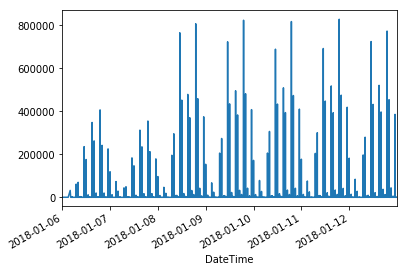

In [46]:
hourly_filtered_grp['entries_delta'].plot()

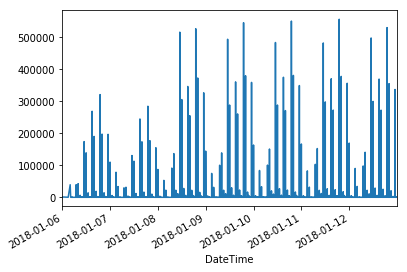

In [47]:
hourly_filtered_grp['exits_delta'].plot()

In [ ]:
hourly_exits_df.hist()

## Station chart

In [48]:
station_grp = filtered_df.groupby(['Station']).sum()

In [57]:
station_df = station_grp['entries_delta'] + station_grp['exits_delta']
station_df.sort_values(inplace=True)
station_df

Station
BROAD CHANNEL      2.153e+03
BEACH 105 ST       3.230e+03
TOMPKINSVILLE      4.423e+03
BEACH 98 ST        5.451e+03
AVENUE I           5.835e+03
SENECA AVE         6.427e+03
ROCKAWAY PARK B    8.187e+03
BEACH 44 ST        8.617e+03
BEACH 90 ST        8.783e+03
AVENUE P           8.837e+03
AQUEDUCT N.COND    1.033e+04
AQUEDUCT RACETR    1.074e+04
BEACH 36 ST        1.105e+04
AVENUE N           1.177e+04
E 143/ST MARY'S    1.307e+04
NEPTUNE AV         1.364e+04
RIT-ROOSEVELT      1.401e+04
RIT-MANHATTAN      1.407e+04
CYPRESS HILLS      1.462e+04
ATLANTIC AV        1.634e+04
215 ST             1.639e+04
55 ST              1.819e+04
W 8 ST-AQUARIUM    1.856e+04
BOTANIC GARDEN     1.949e+04
104 ST             1.990e+04
BAY 50 ST          2.059e+04
BRONX PARK EAST    2.091e+04
AVENUE X           2.104e+04
121 ST             2.137e+04
88 ST              2.190e+04
BEACH 67 ST        2.243e+04
BEACH 60 ST        2.245e+04
BUSHWICK AV        2.253e+04
WHITLOCK AV        2.263e+04
FOREST

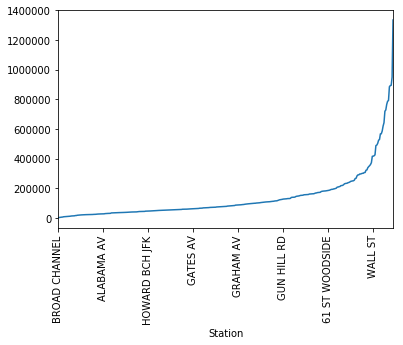

In [55]:
station_df.plot(rot=90)

## Q: Can we identify which stations are in a business district?
## A: Not with certainty.

In [61]:
morning_mask = (filtered_df['DateTime'].dt.hour >= 8) & (filtered_df['DateTime'].dt.hour <= 10)

In [63]:
morning_mask.value_counts()

False    172978
True      17737
Name: DateTime, dtype: int64

In [66]:
evening_mask = (filtered_df['DateTime'].dt.hour >= 16) & (filtered_df['DateTime'].dt.hour <= 18)

In [67]:
evening_mask.value_counts()

False    176045
True      14670
Name: DateTime, dtype: int64

* **Note:** We're filtering out ~5% of the rows.

In [68]:
morning_station_df = filtered_df[morning_mask].groupby(['Station']).sum()

In [69]:
evening_station_df = filtered_df[evening_mask].groupby(['Station']).sum()

In [70]:
morning_business_stations_mask = morning_station_df['entries_delta'] < morning_station_df['exits_delta']
morning_business_stations = set(morning_station_df[morning_business_stations_mask].index)

In [71]:
evening_business_stations_mask = evening_station_df['entries_delta'] > evening_station_df['exits_delta']
evening_business_stations = set(evening_station_df[evening_business_stations_mask].index)

In [72]:
len(morning_business_stations)

68

In [73]:
len(evening_business_stations)

165

In [74]:
len(morning_business_stations - evening_business_stations)

29

In [75]:
len(evening_business_stations - morning_business_stations)

126

## Traffic per station

In [ ]:
station_df = filtered_df.copy()
station_df['traffic'] = station_df['entries_delta'] + station_df['exits_delta']
station_df.drop(['dt_delta', 'entries_delta', 'exits_delta'], axis=1, inplace=True)
station_df.index.ControlArea = 'ControlArea'
station_df.index.Unit = 'Unit'
station_df.index.SCP = 'SCP'
station_df.reset_index(inplace=True)
station_df.drop(['ControlArea', 'Unit', 'SCP', 'Date', 'DateTime'], axis=1, inplace=True)

In [ ]:
station_grouped = station_df.groupby('Station')

In [ ]:
station_df = pd.DataFrame(station_grouped['traffic'].aggregate('sum').astype(int))

In [ ]:
station_df.sort_values(by=['traffic'])